# 3. SORU
Bu soru icin 5-8 saatten fazlasina ihtiyac var, sadece computation/traininig bile daaha faazla surer!

## Mounting the Google Drive Connection

In [ ]:
# COLAB GOOGLE DRIVE CONNECTION/ MOUNT
try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

if IN_COLAB:
  print("We're running Colab")

  # MOUNT
if IN_COLAB:
  # Mount the Google Drive at mount
  mount='/content/gdrive'
  print("Colab: mounting Google drive on ", mount)

  drive.mount(mount)

  # Switch to the directory on the Google Drive that you want to use
  import os
  drive_root = mount + "/My Drive/stackoverflow"
  
  # Create drive_root if it doesn't exist
  create_drive_root = True
  if create_drive_root:
    print("\nColab: making sure ", drive_root, " exists.")
    os.makedirs(drive_root, exist_ok=True)
  
  # Change to the directory
  print("\nColab: Changing directory to ", drive_root)
  %cd $drive_root
print('='*40)
%pwd

We're running Colab
Colab: mounting Google drive on  /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

Colab: making sure  /content/gdrive/My Drive/stackoverflow  exists.

Colab: Changing directory to  /content/gdrive/My Drive/stackoverflow
/content/gdrive/My Drive/stackoverflow


'/content/gdrive/My Drive/stackoverflow'

## Import necessary moduls


In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Other imports for processing data
import string
import numpy as np
import pandas as pd

## Load and View Dataset

In [ ]:
data_set = pd.read_csv("stack.csv")
data_set.shape

(32890, 10)

In [ ]:
df = data_set[0:1000]
df.shape

(1000, 10)

In [ ]:
df[0:3]

,Unnamed: 0,tags,owner,title,body,score,last_activity_date,creation_date,question_id,view_count
0,1328,"['python', 'pip', 'tox']","{'reputation': 38, 'user_id': 17981284, 'displ...",tox refuses to use deps setting in py38 and va...,I have a Django project that i'm trying to set...,0,2022-04-05 03:47:16,2022-04-01 00:22:22,71700514,467
1,2385,"['python', 'pip', 'easyocr']","{'reputation': 11, 'user_id': 18649779, 'displ...",easyocr installation error when install pillow,"I'm trying to install the easyocr library, but...",-1,2022-04-03 14:42:33,2022-04-01 00:27:03,71700531,132
2,2175,"['python', 'reduce', 'numba', 'jit', 'jax']","{'reputation': 79, 'user_id': 18649992, 'displ...",JAX(XLA) vs Numba(LLVM) Reduction,Is it possible to make CPU only reductions wit...,2,2022-04-03 23:01:43,2022-04-01 02:15:55,71701041,713


## Pre-processing

In [ ]:
for i in range(0, (len(df) ) ):
  #tags = df['tags'].values[i]
  df['body'].values[i] = df['body'].values[i].replace("\n", "\n_\n ")
  df['body'].values[i] = df['body'].values[i].replace("\n_", df['tags'].values[i])

In [ ]:
for i in range(0, (len(df) ) ):
  df['body'].values[i] = df['body'].values[i].replace("'","")
  df['body'].values[i] = df['body'].values[i].replace("[", ' ')
  df['body'].values[i] = df['body'].values[i].replace("]", ' ')
  df['body'].values[i] = df['body'].values[i].replace("(", ' ')
  df['body'].values[i] = df['body'].values[i].replace(")", ' ')
  df['body'].values[i] = df['body'].values[i].replace(",", ' ')

## Creating a CORPUS and TOKENIZE:










In [ ]:
def create_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.lower()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [ ]:
# Create the corpus using the 'text' column containing lyrics
corpus = create_corpus(df, 'body')

# Tokenize the corpus
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(corpus)

total_words = tokenizer.num_words

# There should be a lot more words now
print(total_words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

100


In [ ]:
sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		sequences.append(n_gram_sequence)

# Pad sequences for equal input length 
#max_sequence_len = max([len(seq) for seq in sequences])
maxmax_sequence_len=100
sequences = np.array(pad_sequences(sequences, maxlen=100, padding='pre'))

# Split sequences between the "input" sequence and "output" predicted word
input_sequences, labels = sequences[:,:-1], sequences[:,-1]
# One-hot encode the labels
one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=total_words)

## MODEL AND APPROACH


> I've dealt this task as ***to create a model which produces new words/sentences.*** like a word generating NLP model, the trained model can guess possible tags from the corpus (generated by body columns' of the dataset).

> For every sample in the dataset, the tags are added in the end of every line (before "\n" symbol). Then, every line is treated as a squence and expect the model to learn suitable tags after a consesequitive word sequence.

> But, this process ***requires a great many of GPU power and RAM***. Even though I use a Colab PRO account, I couldn’t achieve to deal all the dataset and limit number of the of the words to 100. 

> These limitations made training a little bit long (several times, I dropped and session was stopped, etc.)

> After several trials; I trained ***the model and tried it with both real data and several artificial statements***. The results are ***satisfactory enough.***

***REMEMBER:*** the model produces ***a probability distrubution function (using softmax) ***for possible outcomes. I only print out 5 top probable candidate tags.

In [ ]:
## MODEL and APPROACH

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

model = Sequential()
model.add(Embedding(total_words, 64, input_length=100-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint_case3.h5", save_best_only=True)

history = model.fit(input_sequences, one_hot_labels, epochs=100, verbose=1, callbacks= model_checkpoint )

Epoch 1/100
3470/3470 [==============================] - 43s 11ms/step - loss: 2.9810 - accuracy: 0.2986
Epoch 2/100
3470/3470 [==============================] - 40s 11ms/step - loss: 2.6096 - accuracy: 0.3523
Epoch 3/100
3470/3470 [==============================] - 39s 11ms/step - loss: 2.5401 - accuracy: 0.3632
Epoch 4/100
3470/3470 [==============================] - 40s 11ms/step - loss: 2.5031 - accuracy: 0.3682
Epoch 5/100
3470/3470 [==============================] - 39s 11ms/step - loss: 2.4799 - accuracy: 0.3718
Epoch 6/100
3470/3470 [==============================] - 40s 11ms/step - loss: 2.4640 - accuracy: 0.3729
Epoch 7/100
3470/3470 [==============================] - 39s 11ms/step - loss: 2.4531 - accuracy: 0.3745
Epoch 8/100
3470/3470 [==============================] - 39s 11ms/step - loss: 2.4446 - accuracy: 0.3760
Epoch 9/100
3470/3470 [==============================] - 39s 11ms/step - loss: 2.4374 - accuracy: 0.3770
Epoch 10/100
3470/3470 [==============================]

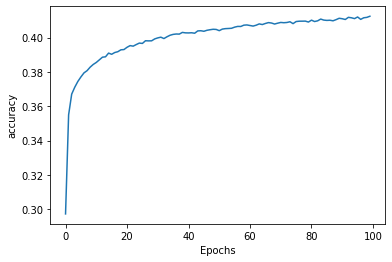

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [ ]:
print( data_set['body'].values[2023] )

I'm creating a dictionary from json data. I have a value 'actions' which is not on all the descriptions but I would like to add it to the ones that have it. How would I do it?
I tried to do it that way item['actions'] if item['actions'] else None but I'm still getting a keyerror with it.
 desc = {item['classid']: 
    [
        item['name'],
        item['market_hash_name'],
        item['icon_url'],
        item['tradable'],
        item['actions'] if item['actions'] else None
    ] for item in inventory['descriptions']}





In [ ]:
print( data_set['tags'].values[2023] )

['python', 'list']


In [ ]:
seed_text = "I'm creating a dictionary from json data."
next_words = 3
max_sequence_len=15
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I'm creating a dictionary from json data. python dictionary output


PRODUCED TAGS FOR A PORTION OF THE REAL STATEMENT: [python], [dictionary], [output]
AND REAL TAGS ARE: [python], [list]

In [ ]:
#an aarbitrary text is given
# the model produces palusible tags
# remember the corpus is highly dominated via tags.

seed_text = "how to merge 2 columns of a df"
next_words = 5
max_sequence_len=100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

how to merge 2 columns of a df python pandas dataframe numpy pythonrequests


PRODUCED TAGS FOR A SYNTETIC STATEMENT: [python], [pandas], [dataframe], [numpy], [pythonrequets]